# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


%matplotlib inline
%config InlineBackend.figure_format = 'retina'
pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_csv('2000-2018_disasters_min50k.csv')
df.head()

,STATE,CZ_TYPE,EVENT_TYPE,BEGIN_DATE_TIME,CZ_TIMEZONE,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,BEGIN_RANGE,BEGIN_AZIMUTH,END_RANGE,END_AZIMUTH,MAGNITUDE_TYPE,MAGNITUDE,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,YEAR,BEGIN_MONTH,BEGIN_DAY,BEGIN_TIME,END_MONTH,END_DAY,END_TIME,DURATION_DAYS,DURATION_HOURS,DURATION_MINUTES
0,MISSOURI,C,Thunderstorm Wind,2000-01-03 08:50:00,CST,03-JAN-00 09:00:00,3,0,0,0,250000.0,0.0,NaN,NaN,NaN,NaN,E,83.0,37.25,-89.67,37.30,-89.53,2000,1,3,08:50:00,1,3,09:00:00,0,0,10
1,ILLINOIS,C,Thunderstorm Wind,2000-01-03 09:18:00,CST,03-JAN-00 09:22:00,0,0,0,0,150000.0,0.0,2.0,NE,4.0,NE,E,100.0,37.73,-89.18,37.75,-89.17,2000,1,3,09:18:00,1,3,09:22:00,0,0,4
2,ILLINOIS,C,Thunderstorm Wind,2000-01-03 09:22:00,CST,03-JAN-00 09:24:00,0,0,0,0,100000.0,0.0,NaN,NaN,NaN,NaN,E,75.0,37.78,-89.12,37.78,-89.12,2000,1,3,09:22:00,1,3,09:24:00,0,0,2
3,INDIANA,C,Thunderstorm Wind,2000-01-03 12:10:00,CST,03-JAN-00 12:10:00,0,0,0,0,100000.0,0.0,NaN,NaN,NaN,NaN,E,65.0,37.98,-87.55,37.98,-87.55,2000,1,3,12:10:00,1,3,12:10:00,0,0,0
4,ILLINOIS,C,Thunderstorm Wind,2000-01-03 14:07:00,CST,03-JAN-00 14:07:00,0,0,0,0,100000.0,0.0,NaN,NaN,NaN,NaN,E,87.0,37.73,-88.93,37.73,-88.93,2000,1,3,14:07:00,1,3,14:07:00,0,0,0


In [3]:
df.shape

(11047, 32)

In [4]:
df.isnull().sum()

STATE                   0
CZ_TYPE                 0
EVENT_TYPE              0
BEGIN_DATE_TIME         0
CZ_TIMEZONE             0
END_DATE_TIME           0
INJURIES_DIRECT         0
INJURIES_INDIRECT       0
DEATHS_DIRECT           0
DEATHS_INDIRECT         0
DAMAGE_PROPERTY         0
DAMAGE_CROPS            0
BEGIN_RANGE          2445
BEGIN_AZIMUTH        2445
END_RANGE            2436
END_AZIMUTH          2436
MAGNITUDE_TYPE          0
MAGNITUDE               0
BEGIN_LAT               0
BEGIN_LON               0
END_LAT                 0
END_LON                 0
YEAR                    0
BEGIN_MONTH             0
BEGIN_DAY               0
BEGIN_TIME              0
END_MONTH               0
END_DAY                 0
END_TIME                0
DURATION_DAYS           0
DURATION_HOURS          0
DURATION_MINUTES        0
dtype: int64

In [5]:
df[df['BEGIN_RANGE'].isnull() == False]

,STATE,CZ_TYPE,EVENT_TYPE,BEGIN_DATE_TIME,CZ_TIMEZONE,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,BEGIN_RANGE,BEGIN_AZIMUTH,END_RANGE,END_AZIMUTH,MAGNITUDE_TYPE,MAGNITUDE,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,YEAR,BEGIN_MONTH,BEGIN_DAY,BEGIN_TIME,END_MONTH,END_DAY,END_TIME,DURATION_DAYS,DURATION_HOURS,DURATION_MINUTES
1,ILLINOIS,C,Thunderstorm Wind,2000-01-03 09:18:00,CST,03-JAN-00 09:22:00,0,0,0,0,150000.0,0.0,2.0,NE,4.0,NE,E,100.00,37.7300,-89.1800,37.7500,-89.1700,2000,1,3,09:18:00,1,3,09:22:00,0,0,4
21,TEXAS,C,Hail,2000-02-24 19:46:00,CST,24-FEB-00 19:46:00,0,0,0,0,75000.0,0.0,2.0,S,2.0,S,HA,2.75,36.1800,-100.2700,36.1800,-100.2700,2000,2,24,19:46:00,2,24,19:46:00,0,0,0
23,IOWA,C,Thunderstorm Wind,2000-02-25 19:00:00,CST,25-FEB-00 19:00:00,0,0,0,0,200000.0,0.0,13.0,NNE,13.0,NNE,E,74.00,41.5000,-93.9200,41.5000,-93.9200,2000,2,25,19:00:00,2,25,19:00:00,0,0,0
27,TEXAS,C,Thunderstorm Wind,2000-03-07 14:04:00,CST,07-MAR-00 14:04:00,0,0,0,0,75000.0,0.0,3.0,NW,3.0,NW,E,60.00,35.2300,-101.8500,35.2300,-101.8500,2000,3,7,14:04:00,3,7,14:04:00,0,0,0
28,TEXAS,C,Thunderstorm Wind,2000-03-07 14:30:00,CST,07-MAR-00 14:30:00,0,0,0,0,150000.0,0.0,6.0,E,6.0,E,E,60.00,35.1800,-101.7200,35.1800,-101.7200,2000,3,7,14:30:00,3,7,14:30:00,0,0,0
30,TEXAS,C,Thunderstorm Wind,2000-03-07 14:55:00,CST,07-MAR-00 14:55:00,0,0,0,0,150000.0,0.0,8.0,E,8.0,E,E,60.00,35.1800,-101.2300,35.1800,-101.2300,2000,3,7,14:55:00,3,7,14:55:00,0,0,0
35,KANSAS,C,Thunderstorm Wind,2000-03-07 21:30:00,CST,07-MAR-00 21:30:00,0,0,0,0,75000.0,0.0,3.0,SE,3.0,SE,E,78.00,37.5200,-97.2300,37.5200,-97.2300,2000,3,7,21:30:00,3,7,21:30:00,0,0,0
37,ALABAMA,C,Thunderstorm Wind,2000-03-10 20:35:00,CST,10-MAR-00 20:45:00,0,0,1,0,900000.0,0.0,6.0,SW,NaN,NaN,E,75.00,33.1300,-87.6300,33.1800,-87.4500,2000,3,10,20:35:00,3,10,20:45:00,0,0,10
38,TEXAS,C,Hail,2000-03-10 21:00:00,CST,10-MAR-00 21:30:00,0,0,0,0,100000.0,0.0,6.0,NE,NaN,NaN,HA,1.50,30.2500,-96.8700,30.3500,-96.8200,2000,3,10,21:00:00,3,10,21:30:00,0,0,30
40,TEXAS,C,Hail,2000-03-10 23:20:00,CST,10-MAR-00 23:20:00,0,0,0,0,100000.0,0.0,5.0,W,5.0,W,HA,1.00,30.3200,-95.5300,30.3200,-95.5300,2000,3,10,23:20:00,3,10,23:20:00,0,0,0


In order to fill in the empty values of `BEGIN_RANGE`, `BEGIN_AZIMUTH`, `END_RANGE` and `END_AZIMUTH`, I calculate the distance between the location with the missing values (since I have their lat and long) and all the complete observations in the dataset and assign the value of the closest point. This makes sense since both Range and Azimuth are positional variables.

In [6]:
# define a function that calculates the distance between two points on the Earth surface, given
# their latitude and longitude
def distance(lat1,lon1,lat2,lon2):
    
    # transforming longitude and latitude to radians
    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    lat2 = np.radians(lat2)
    lon2 = np.radians(lon2)
    
    # latitude and longitude difference
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    # radius of the Earth in km
    R = 6373 
    
    # multipliers 
    a = np.power(np.sin(dlat), 2) + np.multiply(np.cos(lat1), np.multiply(np.cos(lat2), np.power(np.sin(dlon/2), 2)))
    c = 2*np.arcsin(np.sqrt(a))
    return R * c

In [7]:
# columns with missing values
fields_to_fill = ['BEGIN_RANGE', 'BEGIN_AZIMUTH', 'END_RANGE', 'END_AZIMUTH']

# iterating over the columns with missing values
for field in fields_to_fill:
    
    # define a subset with no missing values
    df_complete = df[df[field].isnull() == False]
    
    # and a subset with all missing values in the column I am considering
    df_to_complete = df[df[field].isnull()]
    
    # for each row of the df with the missing value
    for index, row in df_to_complete.iterrows():
        
        # create a column with the values of distance between the point I am considering and all the points
        # in the df with no missing values. Depending on whether I am iterating over BEGIN or END columns,
        # I will consider BEGIN or END latitude and longitude values
        if field.startswith('BEGIN'):
            df_complete['dist'] = distance(row['BEGIN_LAT'], row['BEGIN_LON'], df_complete['BEGIN_LAT'], df_complete['BEGIN_LON'])
        else:
            df_complete['dist'] = distance(row['END_LAT'], row['END_LON'], df_complete['END_LAT'], df_complete['END_LON'])
        
        # getting the index of the row with the shortest distance
        idx = df_complete['dist'].idxmin()
        
        # assignign to the missing observation the value of its closest point 
        df.loc[index,field] = df_complete.loc[idx,field]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [8]:
df.isnull().sum()

STATE                0
CZ_TYPE              0
EVENT_TYPE           0
BEGIN_DATE_TIME      0
CZ_TIMEZONE          0
END_DATE_TIME        0
INJURIES_DIRECT      0
INJURIES_INDIRECT    0
DEATHS_DIRECT        0
DEATHS_INDIRECT      0
DAMAGE_PROPERTY      0
DAMAGE_CROPS         0
BEGIN_RANGE          0
BEGIN_AZIMUTH        0
END_RANGE            0
END_AZIMUTH          0
MAGNITUDE_TYPE       0
MAGNITUDE            0
BEGIN_LAT            0
BEGIN_LON            0
END_LAT              0
END_LON              0
YEAR                 0
BEGIN_MONTH          0
BEGIN_DAY            0
BEGIN_TIME           0
END_MONTH            0
END_DAY              0
END_TIME             0
DURATION_DAYS        0
DURATION_HOURS       0
DURATION_MINUTES     0
dtype: int64

I want to add a column with the total duration in hours for EDA purposes.

In [68]:
df['TOTAL_DURATION_HR'] = round(df['DURATION_DAYS']*24 + df['DURATION_HOURS'] + df['DURATION_MINUTES']/60,1)

## Plotting

Creating a dataframe with cumulative values by State.

In [16]:
states_df = pd.DataFrame(df['STATE'].value_counts())
states_df['property_damage_$M'] = (df.groupby('STATE')['DAMAGE_PROPERTY'].sum()/1000000)
states_df['crops_damage_$M'] = (df.groupby('STATE')['DAMAGE_CROPS'].sum()/1000000)
states_df.columns = ['num_events', 'property_damage_$M','crops_damage_$M']
states_df['deaths_direct'] = df.groupby('STATE')['DEATHS_DIRECT'].sum()
states_df['deaths_indirect'] = df.groupby('STATE')['DEATHS_INDIRECT'].sum()


states_df.head()

,num_events,property_damage_$M,crops_damage_$M,deaths_direct,deaths_indirect
TEXAS,1321,9508.7200,217.253,1,3
GEORGIA,693,519.0472,0.420,7,1
MISSISSIPPI,673,835.4930,18.325,2,1
NEBRASKA,671,1055.0610,743.231,1,0
ILLINOIS,609,686.2980,29.922,3,0


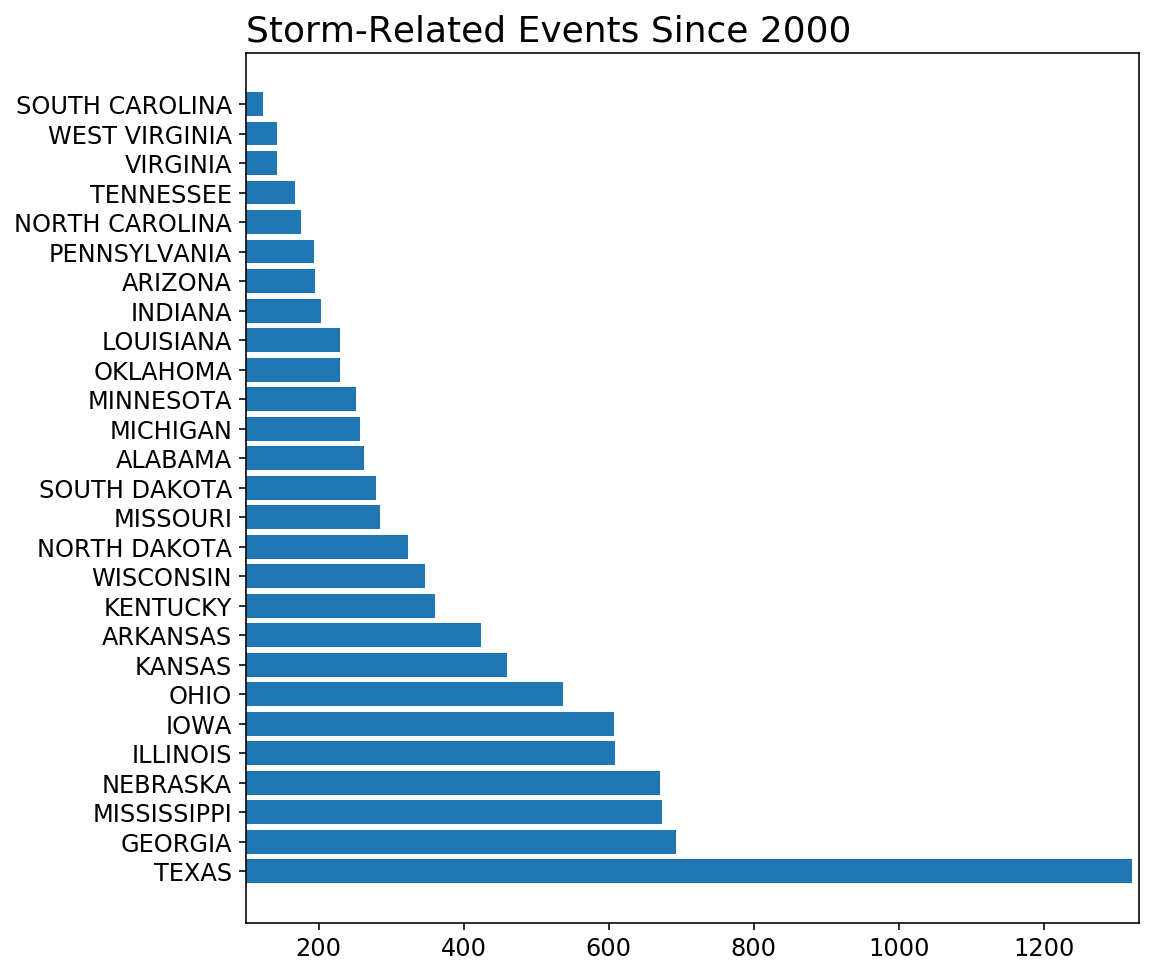

In [17]:
plt.figure(figsize = (8,8))
plt.barh(states_df[states_df['num_events']>100].index,
         states_df.loc[states_df['num_events']>100,'num_events'])
plt.title('Storm-Related Events Since 2000', fontsize = 18, ha = 'left', x = 0)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.xlim(100,states_df['num_events'].max()+10);

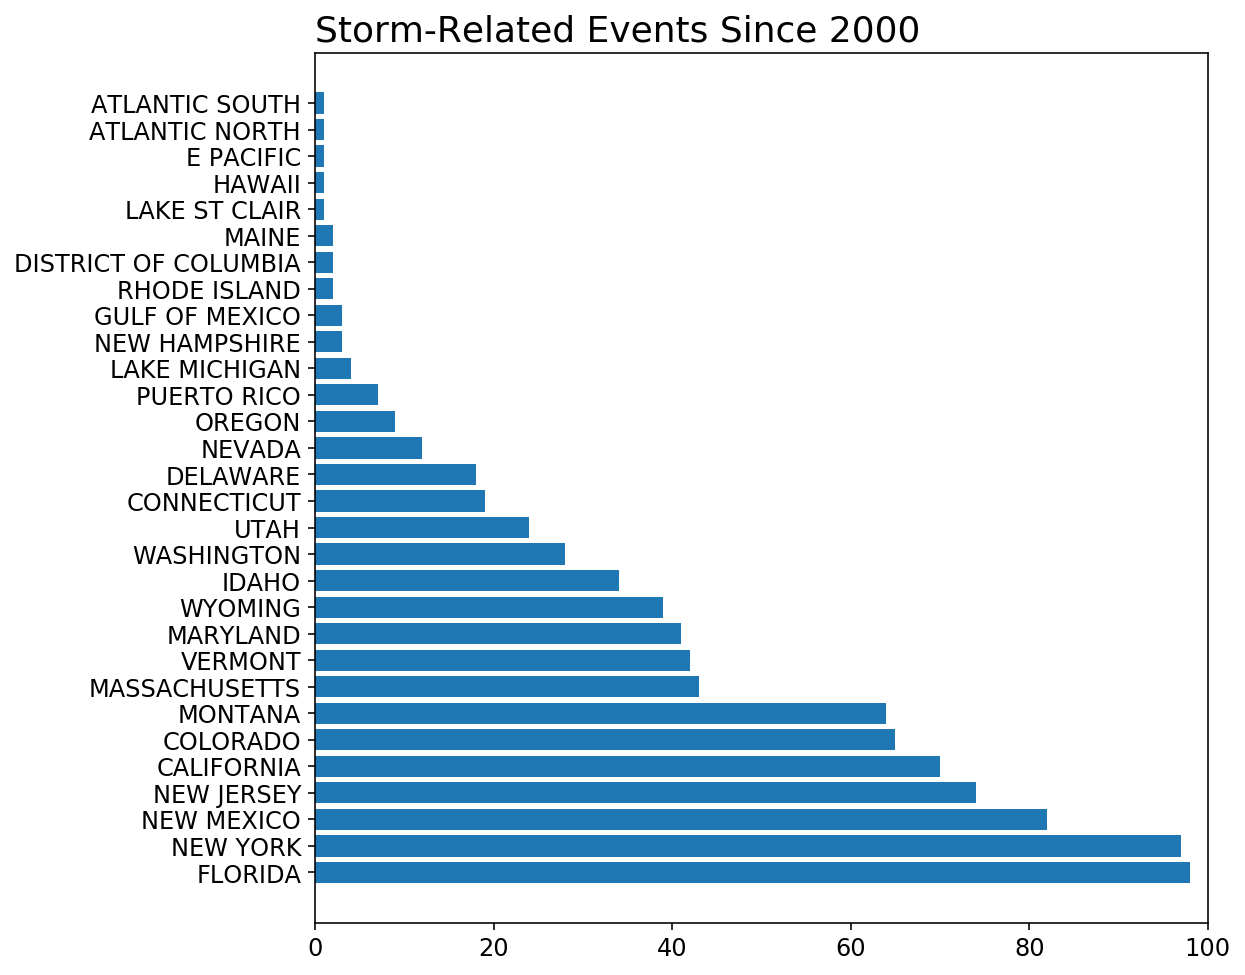

In [18]:
plt.figure(figsize = (8,8))
plt.barh(states_df[states_df['num_events']<=100].index,
         states_df.loc[states_df['num_events']<=100,'num_events'])
plt.title('Storm-Related Events Since 2000', fontsize = 18, ha = 'left', x = 0)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.xlim(0,100);

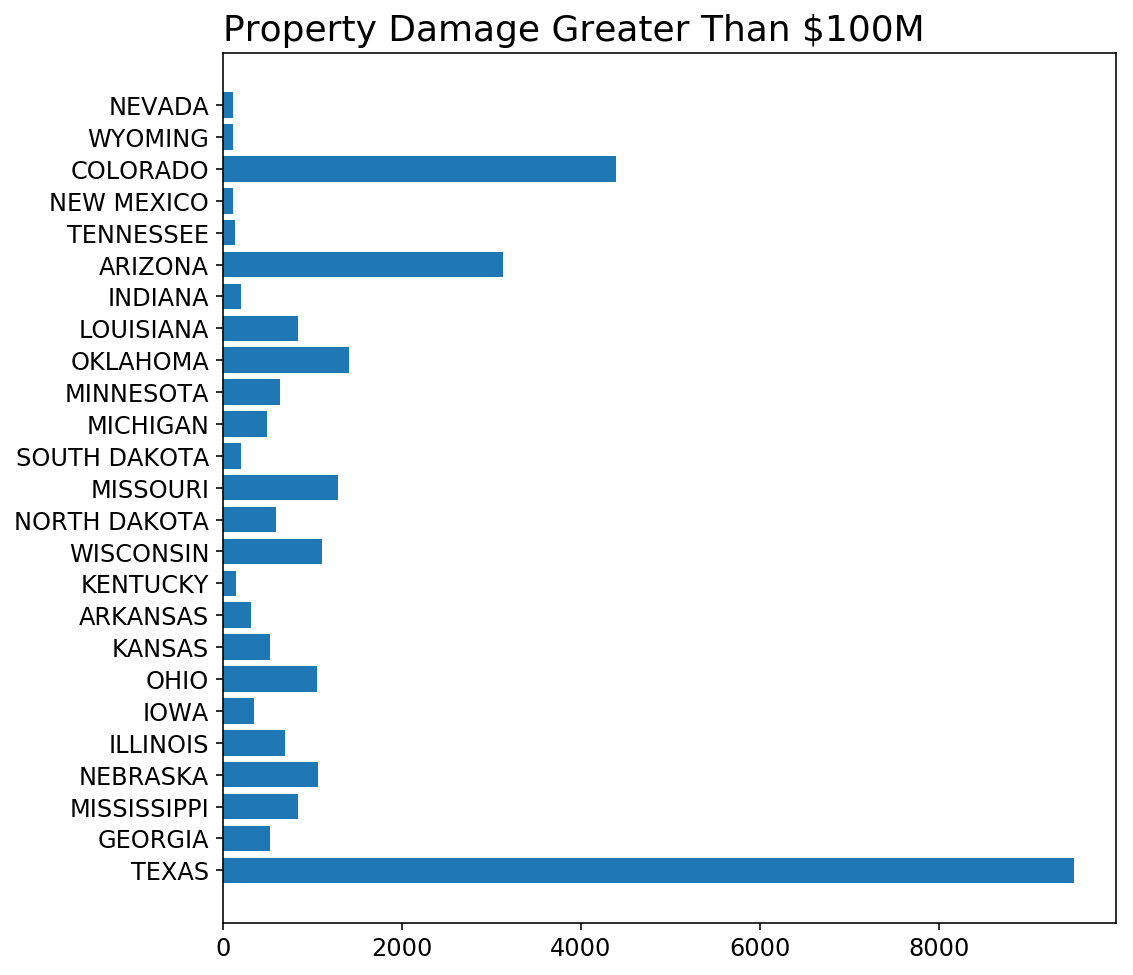

In [81]:
plt.figure(figsize = (8,8))
plt.barh(states_df[states_damage['property_damage_$M']>100].index, 
         states_df.loc[states_damage['property_damage_$M']>100,'property_damage_$M'])
plt.title('Property Damage Greater Than $100M', fontsize = 18, ha = 'left', x = 0)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12);

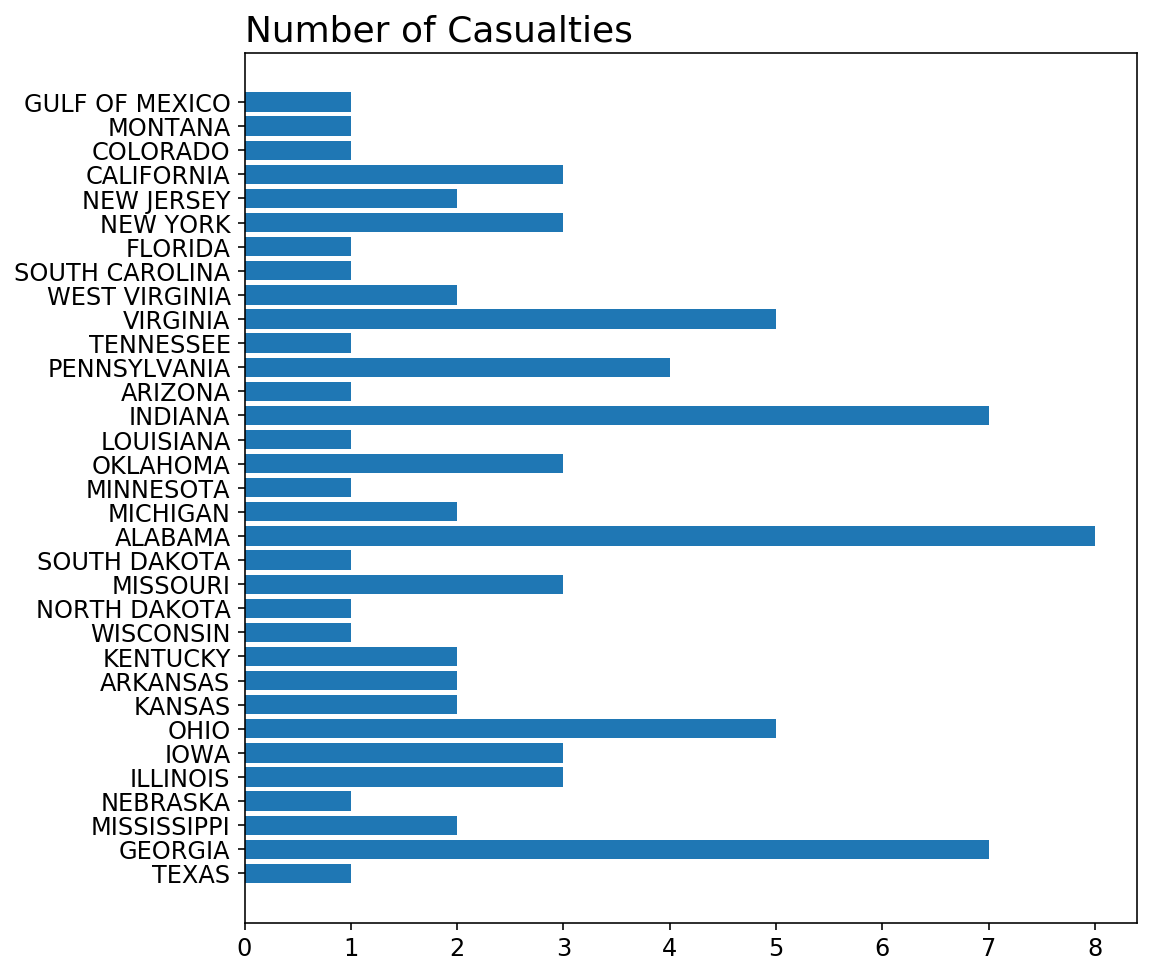

In [24]:
plt.figure(figsize = (8,8))
plt.barh(states_df[states_df['deaths_direct']>0].index, states_df.loc[states_df['deaths_direct']>0, 'deaths_direct'])

plt.title('Number of Casualties', fontsize = 18, ha = 'left', x = 0)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12);

In [27]:
df.index

RangeIndex(start=0, stop=11047, step=1)

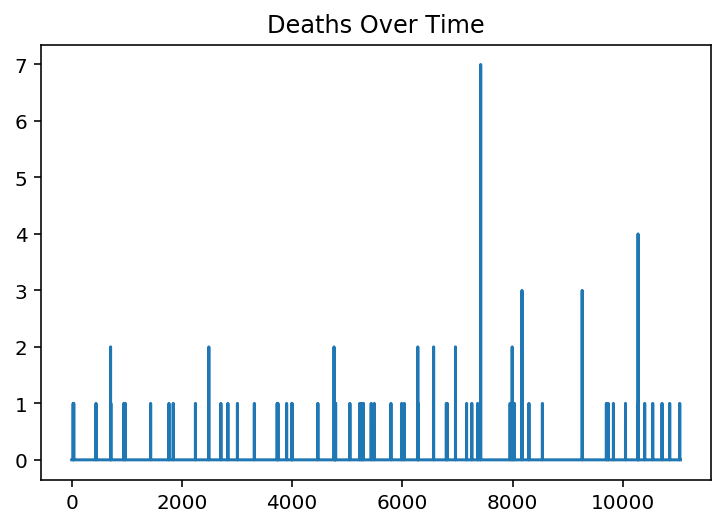

In [79]:
plt.plot(df.index, df['DEATHS_DIRECT'])
plt.title('Deaths Over Time');

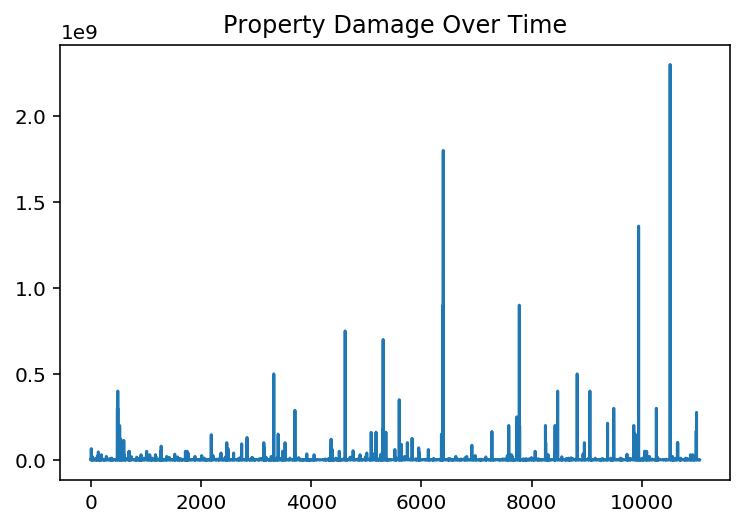

In [80]:
plt.plot(df.index, df['DAMAGE_PROPERTY'])
plt.title('Property Damage Over Time');

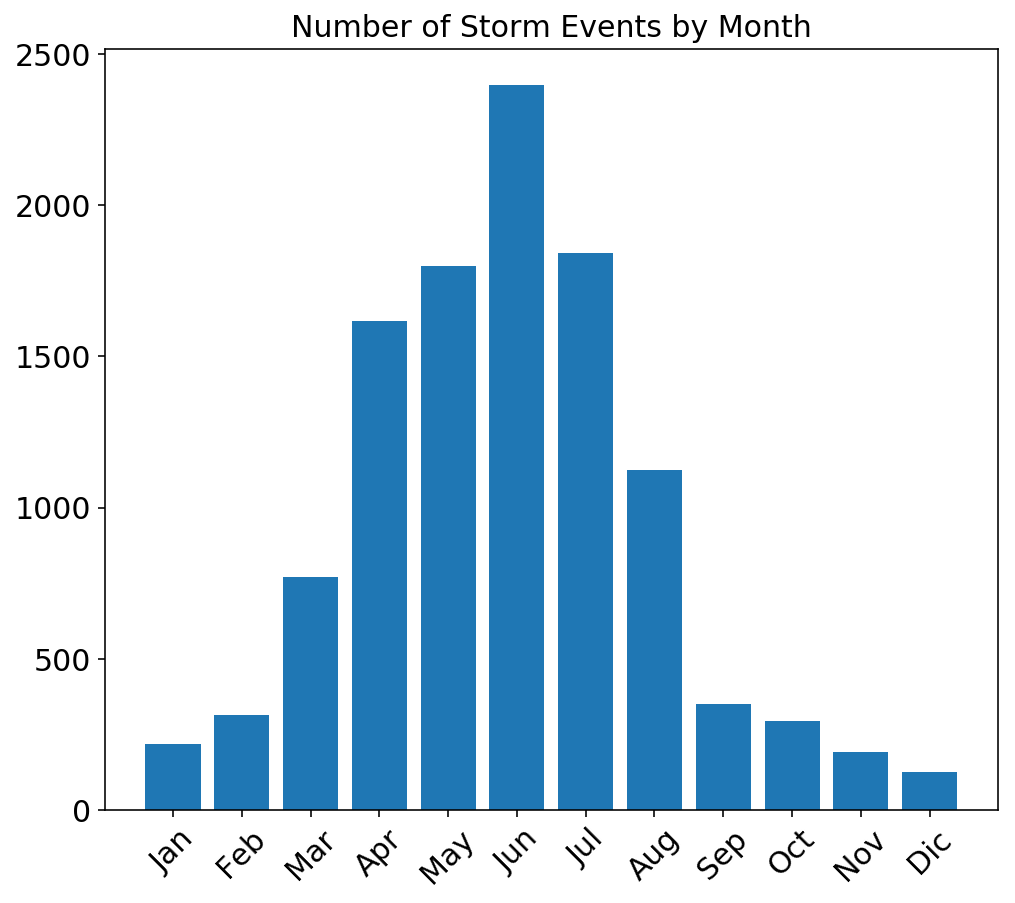

In [59]:
plt.figure(figsize=(8,7))
plt.bar(df['BEGIN_MONTH'].value_counts().sort_index().index, df['BEGIN_MONTH'].value_counts().sort_index().values)
plt.title('Number of Storm Events by Month', fontsize = 15)
plt.xticks(range(1,13),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dic'],
           rotation = 45, fontsize = 15)
plt.yticks(fontsize = 15);

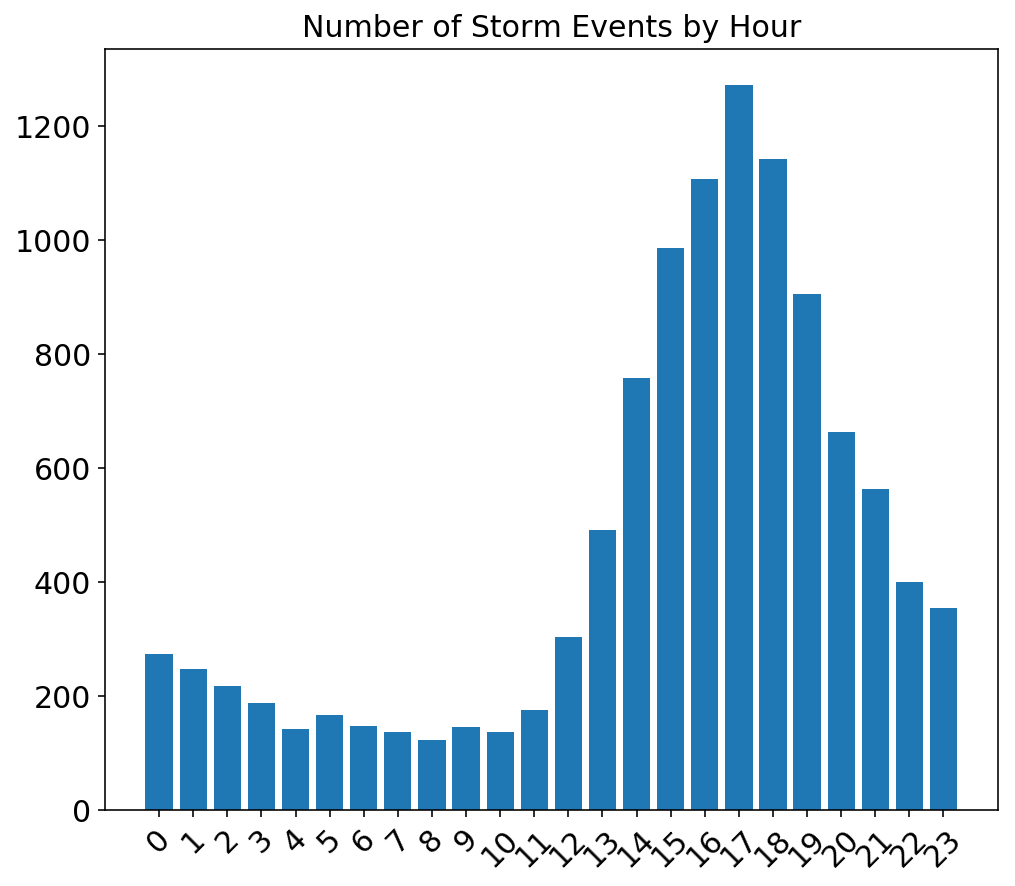

In [60]:
plt.figure(figsize=(8,7))
plt.bar(pd.to_datetime(df['BEGIN_TIME']).dt.hour.value_counts().sort_index().index,
        pd.to_datetime(df['BEGIN_TIME']).dt.hour.value_counts().sort_index().values)
plt.title('Number of Storm Events by Hour', fontsize = 15)
plt.xticks(range(0,24), fontsize = 15, rotation = 45)
plt.yticks(fontsize = 15);
        

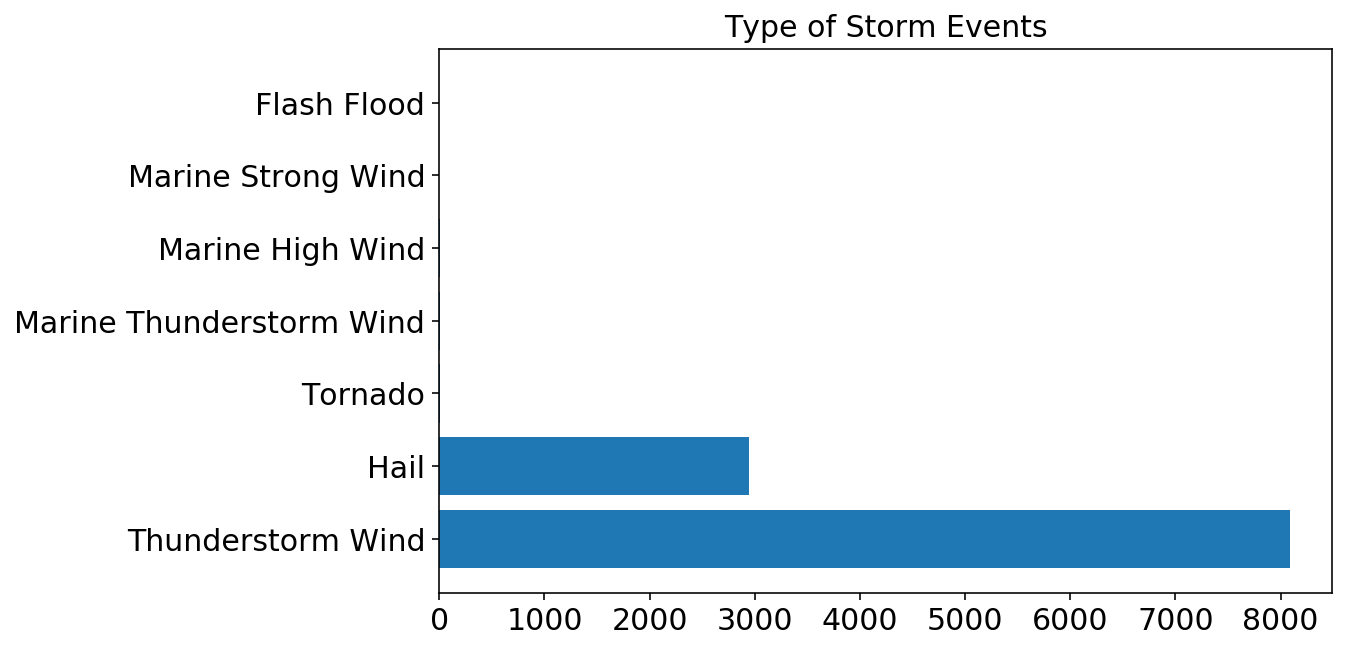

In [64]:
plt.figure(figsize=(8,5))
plt.barh(df['EVENT_TYPE'].value_counts().index, df['EVENT_TYPE'].value_counts().values)
plt.title('Type of Storm Events', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);

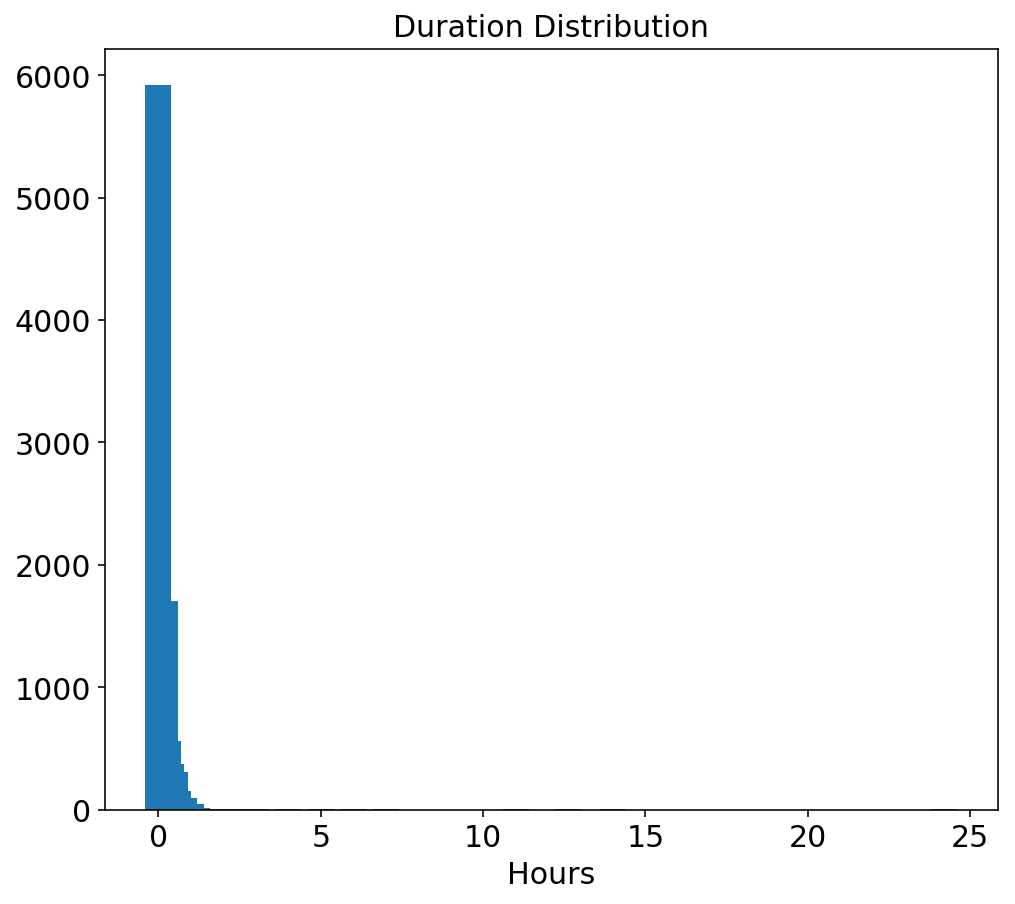

In [77]:
plt.figure(figsize=(8,7))
plt.bar(df['TOTAL_DURATION_HR'].value_counts().sort_index().index,
         df['TOTAL_DURATION_HR'].value_counts().sort_index().values)
plt.title('Duration Distribution', fontsize = 15)
plt.xticks(fontsize = 15)
plt.xlabel('Hours', fontsize = 15)
plt.yticks(fontsize = 15);